<a href="https://colab.research.google.com/github/maengg/Section1_Poject/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
import pandas as pd

df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
# 필요없는 컬럼 제거
df = df.drop(['Unnamed: 0'], axis=1)
df.dropna(inplace =True)

# sales 단위 통일
repl_dict = {'[kK]': '/1e3', '[mM]': ''}
df['NA_Sales'] = df['NA_Sales'].replace(repl_dict, regex=True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace(repl_dict, regex=True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace(repl_dict, regex=True).map(pd.eval)
df['Other_Sales'] = df['Other_Sales'].replace(repl_dict, regex=True).map(pd.eval)
df.loc[10,:]

Name                  Ford Racing
Platform                       PS
Year                       2001.0
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     0.48
EU_Sales                     0.33
JP_Sales                      0.0
Other_Sales                  0.06
Name: 10, dtype: object

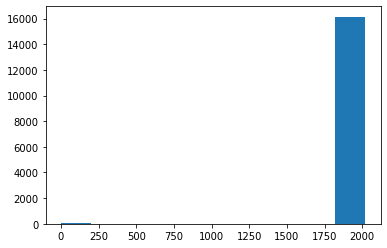

In [6]:
# 연속형 데이터 중 year 데이터 확인
import matplotlib.pyplot as plt

plt.hist(df['Year'])
plt.show()

In [7]:
# 250보다 작은 경우 확인
df[df['Year'] < 250]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0.00,0.00,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0.00,0.02,0.00,0.00
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0.00,0.00,0.00
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00


In [8]:
# year 데이터 이상치 수정

list_year = []

for a in df['Year']:
  if a >=0 and a <=21:
    a = 2000 + a
  elif a >=22 and a <= 99:
    a = 1900 + a
  else :
    a = a
  list_year.append(a)
df['Year'] = list_year
df.loc[81, :]

Name           Treasures of the Deep
Platform                          PS
Year                          1997.0
Genre                         Action
Publisher         Namco Bandai Games
NA_Sales                         0.1
EU_Sales                        0.07
JP_Sales                         0.0
Other_Sales                     0.01
Name: 81, dtype: object

In [9]:
# Total_sales라는 feature 추가
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] +df['Other_Sales']

In [12]:
# 중복 데이터 확인.
df.duplicated().sum()

0

## 장르와 출고량, 장르와 플랫폼간의 연관이 있는지 확인

In [13]:
# 장르와 Total_Sales, 장르와 플랫폼간의 연관이 있는지 확인
from scipy.stats import chi2_contingency

df_sub = df[['Genre', 'Platform', 'Publisher','Total_Sales']].astype('category')

gen_sales = pd.crosstab(df['Genre'], df['Total_Sales'])
gen_plat = pd.crosstab(df['Genre'], df['Platform'])


print('gen-sales',chi2_contingency(gen_sales)[1])
print('gen-plat',chi2_contingency(gen_plat)[1])

gen-sales 5.4560699922727875e-06
gen-plat 0.0


장르와 출고량, 장르와 플랫폼 간에는 연관성이 있는 걸로 확인.

## 한 지역에만 특화되어 있는 장르의 경우 높은 출고량을 기록하기 불리하다는 판단으로 장르와 지역간의 연관성 확인

In [14]:
# 장르와 지역간의 연관성이 있는지 확인하는 chi-test
from scipy.stats import chi2_contingency
df_na = df[['Genre', 'NA_Sales']].astype('category')
df_na = pd.crosstab(index = df_na['Genre'], columns = df_na['NA_Sales'])

df_eu = df[['Genre', 'EU_Sales']].astype('category')
df_eu = pd.crosstab(index = df_eu['Genre'], columns = df_eu['EU_Sales'])

df_jp = df[['Genre', 'JP_Sales']].astype('category')
df_jp = pd.crosstab(index = df_jp['Genre'], columns = df_jp['JP_Sales'])

df_oth = df[['Genre', 'Other_Sales']].astype('category')
df_oth = pd.crosstab(index = df_oth['Genre'], columns = df_oth['Other_Sales'])

print('NA',chi2_contingency(df_na)[1])
print('EU',chi2_contingency(df_eu)[1])
print('JP',chi2_contingency(df_jp)[1])
print('Other',chi2_contingency(df_oth)[1])

NA 5.923660629019466e-63
EU 3.0738581086137684e-38
JP 5.0137376205319465e-171
Other 1.73126439723736e-19


모든 지역에서 pvalue 값이 0.05 보다 작아 장르와 출고량간의 연관이 있다고 볼 수 있다. **즉 ,선호하는 장르가 있다고 볼 수 있다.**

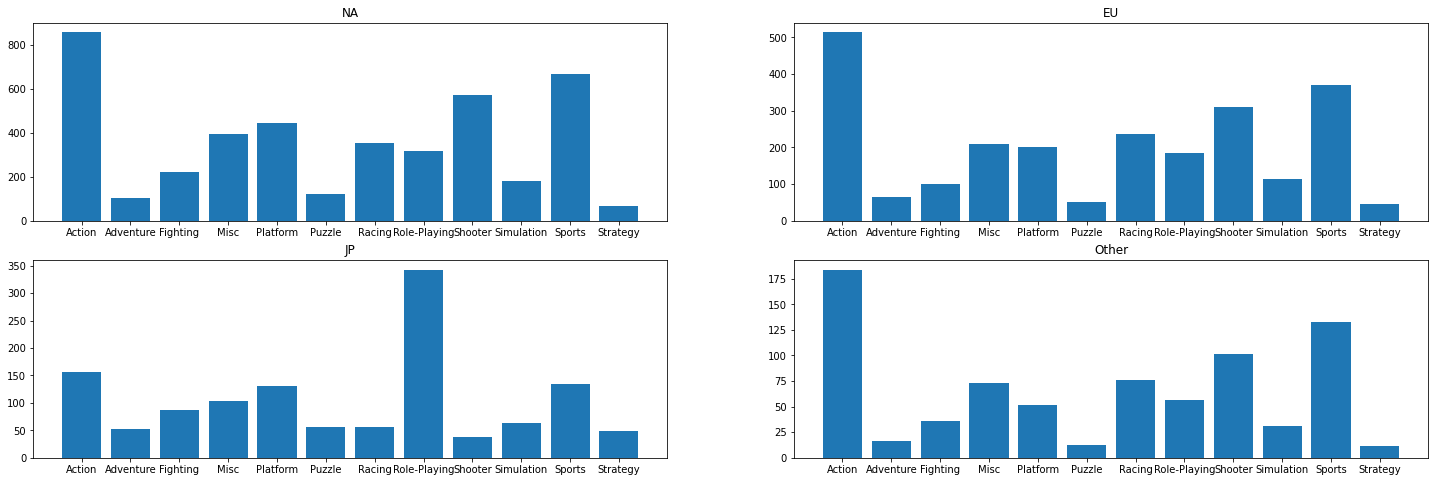

In [15]:
# 지역별 출고량 비교 (합계)
df_genre = df.groupby(['Genre']).sum()
df_genre.reset_index(inplace = True)
df_genre.drop(['Year'], axis=1 , inplace =True)
df_genre

plt.figure(figsize=(25,8))

plt.subplot(2,2,1)
plt.bar(x= df_genre['Genre'], height = df_genre['NA_Sales'])
plt.title('NA')

plt.subplot(2,2,2)
plt.bar(x= df_genre['Genre'], height = df_genre['EU_Sales'])
plt.title('EU')

plt.subplot(2,2,3)
plt.bar(x= df_genre['Genre'], height = df_genre['JP_Sales'])
plt.title('JP')

plt.subplot(2,2,4)
plt.bar(x= df_genre['Genre'], height = df_genre['Other_Sales'])
plt.title('Other')

plt.show()

1. 북미지역, 유럽지역과 타지역은 Action, Sports, Shooter 게임에 선호도가 높은 것을 볼 수 있다.
2. 반면 일본지역은 **Role-Playing** 게임에 선호도가 높은 것을 볼 수 있다.

Role-Playing의 경우 일본 지역에 특화되어 있기에 높은 출고량에 분리하다고 판단.

## 출고량 높은 장르와 플랫폼 확인

In [16]:
# 총 출고량이 높은 게임 정렬.

df_sales = df.sort_values(by = ['Total_Sales'], ascending =False)
df_sales.reset_index(inplace=True)
df_sales.drop(['index'], axis=1, inplace=True)
df_top500 = df_sales.head(500)

In [17]:
# top 500 장르 확인
# df_top500['Genre'].value_counts()
top_gen = ['Action', 'Shooter', 'Sports', 'Platform', 'Role-playing', 'Misc', 'Racing','Fighting', 'Simulation', 'Puzzle','Adventure','Strategy']

In [18]:
# top 500 플랫폼 확인
# df_top500['Platform'].value_counts()
top500_platform = ['PS2', 'X360','PS3','PS', 'DS', 'Wii', 'PS4', 'NES', 'GB','3DS', 'PC', 'N64', 'SNES', 'XOne', 'GBA', 'PSP', 'WiiU','GC','XB','2600','GEB']

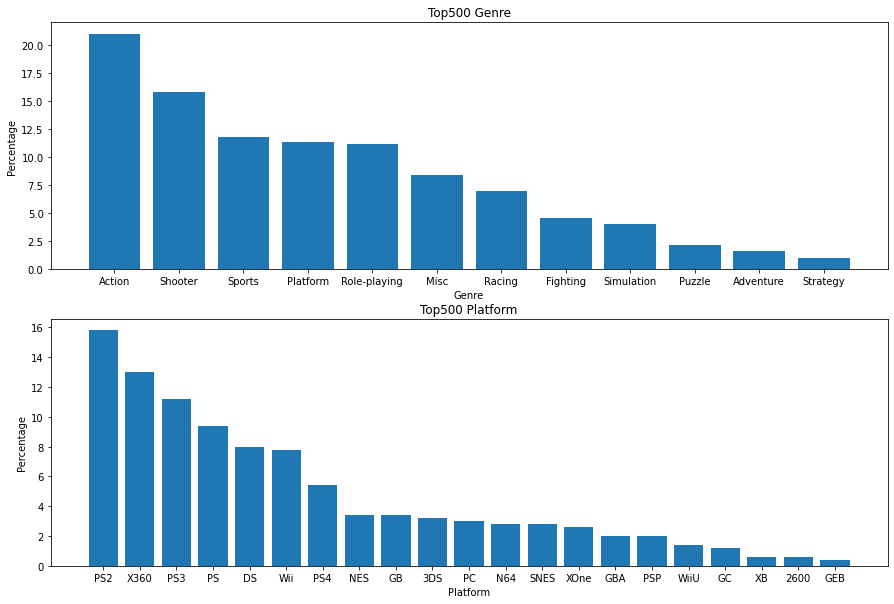

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.bar(x=top_gen ,height = (df_top500['Genre'].value_counts()/500) * 100)
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.title('Top500 Genre')

plt.subplot(2,1,2)
plt.bar(x=top500_platform ,height = (df_top500['Platform'].value_counts()/500) * 100)
plt.title('Top500 Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.show()

출고량이 높은 게임은 주로 플랫폼으로 **콘솔**을 이용하는 경우가 대부분이었고, 

장르의 경우 **Action, Shooter, Sports, Platform, Role-playing** 순이었다.

## 연도별 게임 장르의 트렌드가 있는지 확인

In [20]:
# 가장 늦게 출시한 연도와 최근 출시 연도 확인
df_sort_year = df.sort_values(by = ['Year'])
df_sort_year.tail() # 1980 ~ 2020

# 5년 단위로 나눔
bins = [1980.0, 1985.0, 1990.0, 1995.0, 2000.0, 2005.0, 2010.0, 2015.0, 2020.0]
labels = [1980,1985, 1990, 1995,2000, 2005, 2010, 2015]
df['binned'] = pd.cut(df['Year'], bins = bins, labels = labels)

In [21]:
df_trend = df.groupby(by = ['binned', 'Genre']).sum()
df_trend.drop(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],axis = 1, inplace = True)
df_trend.reset_index(inplace=True)

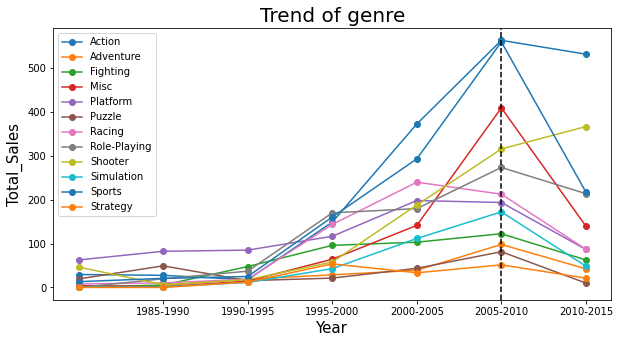

In [39]:
df_trend2 = pd.pivot_table(df_trend, values = 'Total_Sales', index = 'binned', columns = 'Genre')
df_trend2.reset_index(inplace=True)
df_trend2.drop(7,inplace = True)
genre = ['Action', 'Adventure', 'Fighting','Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy']
plt.figure(figsize = (10,5))
for a in genre:
  plt.plot(df_trend2[a], 'o-', label = a)
plt.xticks([1,2,3,4,5,6], labels = ['1985-1990','1990-1995','1995-2000', '2000-2005','2005-2010', '2010-2015'])
plt.axvline(x=5, ymin=0, ymax= 35 , ls = '--', color ='black')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total_Sales', fontsize = 15)
plt.title('Trend of genre', fontsize = 20)
plt.legend()
plt.show()

1. 2000년도에는 **Action, Sports, Racing** 순으로 인기가 있었다고 볼 수 있다. 
2. 2005년도에 **Action, Sports, Misc, Shooter** 등의 게임이 급격히 증가한 것을 볼 수 있다.
3. 2010년이 지나고 나서는 대부분의 게임이 그 전에 비해 출고량이 급격히 떨어지고 있다 
4. **Action의** 경우 다른 장르에 비해 2010년 이후 많은 감소를 보이지 않았고 **Shooter의** 경우 지속적으로 출고량이 증가하는 걸 볼 수 있다.

## 진입장벽이라고 할 수 있는 장르별 **상위 게임의 독점정도 확인**

In [50]:
# 스포츠 장르 확인
import numpy as np
df_sports = df[(df['Genre'] == 'Sports')]
df_sports.sort_values(by = 'Total_Sales', ascending=False, inplace = True)
# df_sports.head(50)
df_wii = df_sports[(df_sports['Name'].str.contains('Wii'))]
sports = df_wii['Total_Sales'].sum() / df_sports['Total_Sales'].sum() * 100 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [57]:
# 액션 장르 확인
df_action = df[(df['Genre'] == 'Action')]
df_action.sort_values(by = 'Total_Sales', ascending=False, inplace = True)
# df_action50
df_thef = df_action[(df_action['Name'].str.contains('Theft'))]
action = df_thef['Total_Sales'].sum()/df_action['Total_Sales'].sum() * 100

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [67]:
# 슈터 장르 확인
df_sho = df[(df['Genre'] == 'Shooter')]
df_sho.sort_values(by = 'Total_Sales', ascending=False, inplace = True)
# df_sho.head(50)
df_call_of = df_sho[(df_sho['Name'].str.contains('Call of Duty'))]
shooter = df_call_of['Total_Sales'].sum() / df_sho['Total_Sales'].sum() * 100

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [54]:
# 플랫폼 장르 확인
df_platf = df[(df['Genre'] == 'Platform')]
# df_platf.head(50)
df_mario = df_platf[(df_platf['Name'].str.contains('Mario'))]
platform = df_mario['Total_Sales'].sum() / df_platf['Total_Sales'].sum() * 100

In [55]:
# 롤플레잉 장르 확인
df_role = df[(df['Genre'] == 'Role-Playing')]
df_role.sort_values(by = 'Total_Sales', ascending = False, inplace = True)
# df_role.head(50)
df_Pokemon = df_role[(df_role['Name'].str.contains('Pokemon'))]
role_playing = df_Pokemon['Total_Sales'].sum()/df_role['Total_Sales'].sum() * 100 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


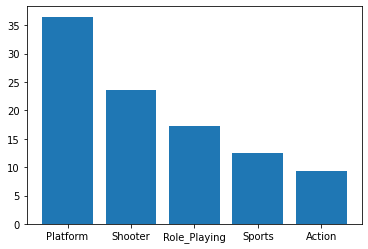

In [70]:
# 독점정도 시각화
y = [platform, shooter, role_playing, sports, action]
plt.bar(x = ['Platform', 'Shooter', 'Role_Playing', 'Sports', 'Action'], height = y)
plt.show()

스포츠와 액션 장르가 그나마 진입장벽이 낮은 것으로 확인

## 장르 선택

- 진입 장벽 : **액션, 스포츠** 유리
- 트렌드 : **액션, 슈터** 유리

두가지 특성을 참고하여 **액션** 장르로 선택.

## 액션 장르와 플랫폼 간의 관계

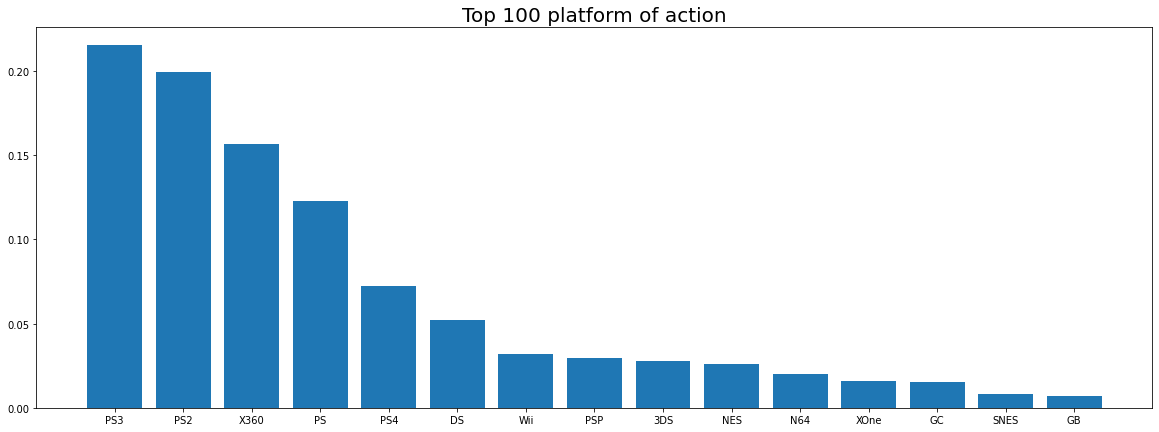

In [71]:
df_action100 = df_action.head(100)
plat_act100 = df_action100.groupby(by = 'Platform').sum()
plat_act100.reset_index(inplace = True)
plat_act100.sort_values(by = 'Total_Sales', ascending = False, inplace = True)

df_action_low100 = df_action.tail(100)
plat_low_act100 = df_action_low100.groupby(by = 'Platform').sum()
plat_low_act100.reset_index(inplace = True)
plat_low_act100.sort_values(by = 'Total_Sales', ascending = False, inplace = True)

plt.figure(figsize= (20,7))
plt.bar(x = plat_act100['Platform'], height = plat_act100['Total_Sales']/np.sum(plat_act100['Total_Sales']))
plt.title('Top 100 platform of action', fontsize = 20)
plt.show()

In [74]:
# 플레이스테이션이 전체 액션게임 출고량에서 차지하는 비중
df_subset = df.groupby(by = ['Genre', 'Platform']).sum()
df_subset.reset_index(inplace=True)
df_subset.sort_values(by='Total_Sales', ascending=False, inplace = True)
# df_subset.head(50)
df_subset2 = df_subset[(df_subset['Genre'] == 'Action')]
df_subset2 = df_subset2.groupby(by= 'Platform').sum()
df_subset2.sort_values(by='Total_Sales', ascending=False, inplace = True)
# df_subse2
# 플레이스테이션 Total_Sales 합계 / 모든 플랫폼 Sales
(301.49+269.68+125.59+84.70)/df_subset2['Total_Sales'].sum()

0.4561991383437052

전체 매출에서 플레이 스테이션이 차지하는 매출 비중 45%

액션게임 Top 100 플랫폼에서도 플레이스테이션이 상위 랭크

## 결론

**액션 게임을 플레이스테이션 플랫폼을 통해 유통**하는 것이 높은 출고량을 기록하는데 유리할 것이다.